# Demo: K-Means with Scikit Learn
<img src="IMG/sk-logo.png" width=200>

* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture


In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F using build in data generators
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Plot Data

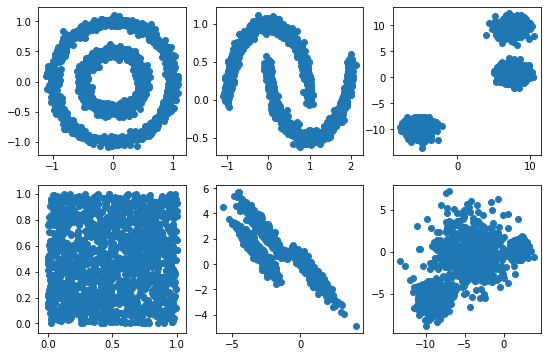

In [3]:
fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1])
axes[0, 1].scatter(B[:,0], B[:,1])
axes[0, 2].scatter(C[:,0], C[:,1])
axes[1, 0].scatter(D[:,0], D[:,1])
axes[1, 1].scatter(E[:,0], E[:,1])
axes[1, 2].scatter(F[:,0], F[:,1])

## K-Means Demo
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means

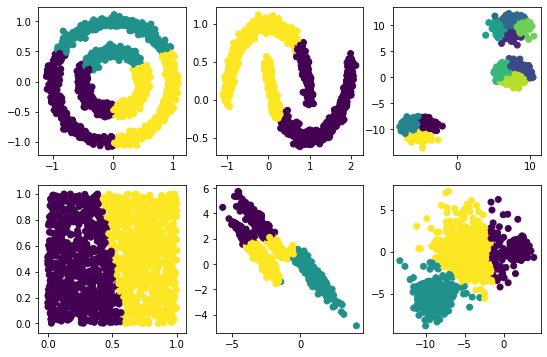

In [11]:
from sklearn.cluster import KMeans
kmeansA = KMeans(n_clusters=3, random_state=0).fit(A) #train for given k
kmeansB = KMeans(n_clusters=2, random_state=0).fit(B)
kmeansC = KMeans(n_clusters=10, random_state=0).fit(C)
kmeansD = KMeans(n_clusters=2, random_state=0).fit(D)
kmeansE = KMeans(n_clusters=3, random_state=0).fit(E)
kmeansF = KMeans(n_clusters=3, random_state=0).fit(F)

#plot again, now with lable coloring
fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1], c=kmeansA.labels_) #get labels and use as color
axes[0, 1].scatter(B[:,0], B[:,1], c=kmeansB.labels_)
axes[0, 2].scatter(C[:,0], C[:,1], c=kmeansC.labels_)
axes[1, 0].scatter(D[:,0], D[:,1], c=kmeansD.labels_)
axes[1, 1].scatter(E[:,0], E[:,1], c=kmeansE.labels_)
axes[1, 2].scatter(F[:,0], F[:,1], c=kmeansF.labels_)

## Score Clustering
Compare the results by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
#sample results for DataSet C
silhouette_score(C,kmeansC.labels_)

0.33719094336165917